In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import svm

In [5]:
from sklearn import metrics

# SVM method

In [8]:
X, y =load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3 ,random_state=0)

In [9]:
print(X_train.shape,
     X_test.shape,
     y_train.shape,
     y_test.shape 
     )

(398, 30) (171, 30) (398,) (171,)


In [10]:
clf=svm.SVC(gamma='auto')
clf.fit(X_train,y_train)

SVC(gamma='auto')

In [11]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
err=1.0-metrics.accuracy_score(y_test,clf.predict(X_test))

In [13]:
print(err)

0.368421052631579


In [14]:
err*X_test.shape[0]

63.00000000000001

# Naive Bayes

In [16]:
print(X[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [17]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb=GaussianNB()
y_pred=gnb.fit(X_train,y_train).predict(X_test)

In [20]:
print("n of mislabeled points out of a total % is :%d"
     %(X_test.shape[0],(y_test!=y_pred).sum())
     )


n of mislabeled points out of a total  171s :13


# Decision trees

In [22]:
from matplotlib import pyplot as plt

In [24]:
from sklearn import tree

In [26]:
trf=tree.DecisionTreeClassifier(criterion='entropy')
trf=trf.fit(X_train,y_train)

In [27]:
y_pred=trf.predict(X_test)

In [28]:
err=1.0-metrics.accuracy_score(y_test,y_pred)

In [29]:
print(err)

0.07602339181286555


In [30]:
#misclassified values
int(err*X_test.shape[0])

13

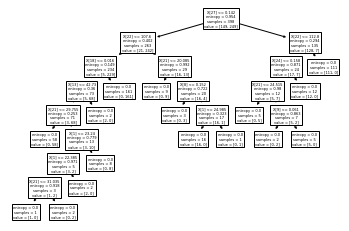

In [31]:
tree.plot_tree(trf)
plt.show()

# Random forests

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
fc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [34]:
fc=fc.fit(X_train,y_train)

In [35]:
y_pred=fc.predict(X_test)

In [36]:
err=1.0-metrics.accuracy_score(y_test,y_pred)

In [37]:
print(err)

0.04678362573099415


In [38]:
int(err*len(y_pred))

8